About the homework: In some tasks, in addition to writing code, answers to questions and conclusions are required (there are special Markdown cells marked with **Answer**).

The ability to analyze the results of experiments is an important skill. Therefore, answers carry more weight than the code: the code accounts for 30% of the task grade, while answers to questions account for 70%.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Download the [dataset about Pokemons](https://www.kaggle.com/datasets/abcsds/pokemon)

In [5]:
df = pd.read_csv('Pokemon.csv')
df.sample(4)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
691,630,Mandibuzz,Dark,Flying,510,110,65,105,55,95,80,5,False
415,378,Regice,Ice,NaN,580,80,50,100,100,200,50,3,True
327,302,SableyeMega Sableye,Dark,Ghost,480,50,85,125,85,115,20,3,False
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True


# Task 1 (1 point)

Investigate  the type of every feature. Is it numerical or cetegorical (nominal or ordinal)? Explain, why.

You may need to check the type of the column or consult the description of the data on Kaggle.com

In [7]:
for column in df.columns:
    print(f"{column}: {df[column].dtype}")

#: int64
Name: object
Type 1: object
Type 2: object
Total: int64
HP: int64
Attack: int64
Defense: int64
Sp. Atk: int64
Sp. Def: int64
Speed: int64
Generation: int64
Legendary: bool


**Answer** \#YOUR ANSWER

'#' - Unique integer identifier,
Names is categorical since its pokemons name
Type 1 categorical,
type 2 categorical, 
Total - sums of stats, so it is numeric/integer,
hp, attack, defence, sp. atk, sp. def, speed is numerical.

Generation (ordinal) and legendary (nominal/binary) is categorical.
(True/False)

# Task 2 (1 point)

It is said in the description of the dataset that `Total` is the sum of the stats after it. Let's check, if it is true.

Create a new column `'New Total'`, what is the sum of `HP, 	Attack,	Defense,	Sp. Atk,	Sp. Def,	Speed`

In [12]:
stats = ["HP", 	"Attack",	"Defense",	"Sp. Atk",	"Sp. Def",	"Speed"]
df['New Total'] = df[stats].sum(axis=1)

Now, print the number of rows that contain deifferent   `'Total'` and `'New Total'` values and depict these rows.

Hint: compare columns `'Total'` and `'New Total'` and filter rows using the comparison.


In [14]:
sum(df['Total'] == df['New Total'])

800

# Task 3 (2 points)

Create a frequency table for the `'Type 1'` feature

In [16]:
counts = df['Type 1'].value_counts()
proportions = df['Type 1'].value_counts(normalize=True)

frequency_table_Type1 = pd.DataFrame({
    'Counts': counts,
    'Proportion': proportions
})
frequency_table_Type1['Percentage'] = round((frequency_table_Type1['Counts']/sum(frequency_table_Type1['Counts'])*100), 2)
frequency_table_Type1

,Counts,Proportion,Percentage
Type 1,,,
Water,112,0.14000,14.00
Normal,98,0.12250,12.25
Grass,70,0.08750,8.75
Bug,69,0.08625,8.62
Psychic,57,0.07125,7.12
Fire,52,0.06500,6.50
Electric,44,0.05500,5.50
Rock,44,0.05500,5.50
Dragon,32,0.04000,4.00


Also, add proportions and percentage for every type  to the table.

Hint: `Series.to_frame` may be a useful function

In [ ]:
#YOUR CODE

Draw a plot to depict the percentage. Make sure to make labels/ticks readable.

<Axes: title={'center': 'Bar Graph Type 1'}, ylabel='Type 1'>

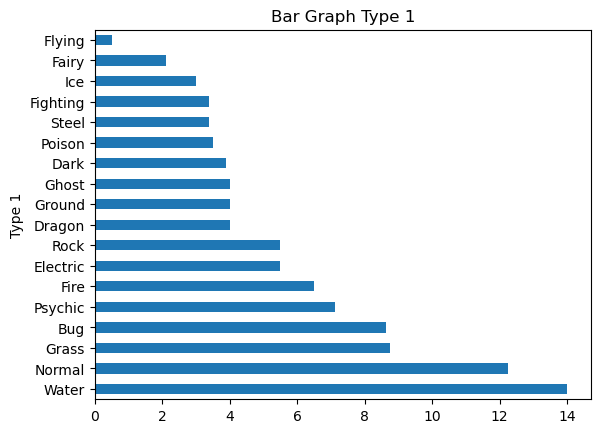

In [18]:
frequency_table_Type1['Percentage'].plot(
    y = 'Type 1',
    kind = 'barh',
    title = 'Bar Graph Type 1',
    stacked = True,
    mark_right = True)

**Answer** \#YOUR ANSWER
Draw conclusions from the plot. (Are there a lot of differnet types? What is the most/least popular type? ...)
the Water type is the most popular, whereas the Flying type is less favorite one.

# Task 4 (2 points)

Compue the measures of central tendency for the `Sp. Atk` feature

In [35]:
from scipy import stats
from scipy.stats import skew


col = 'Sp. Atk'
def SumMeasures(data):
    mu = np.mean(data)
    mode_res = stats.mode(data)
    mode = mode_res[0]
    median = np.median(data)
    Summary_measures = [mu,mode,median]
    return Summary_measures

SumMeasures(df[col])

[72.82, 60, 65.0]

In [41]:
skewness = skew(df[col].dropna())
skewness

0.7432655278002076

Draw a histogram for the feature and depict the measures on it

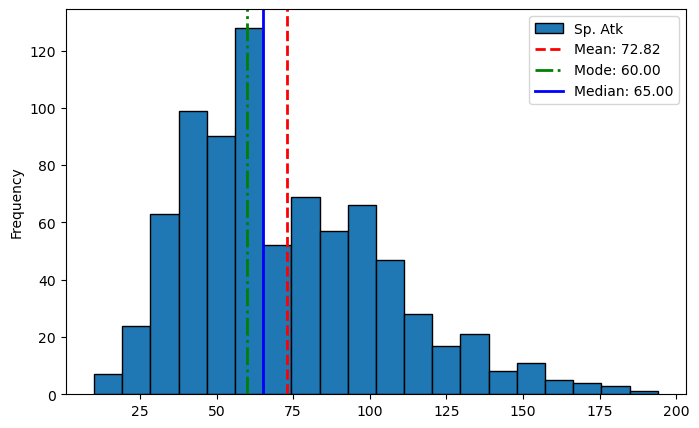

In [45]:
df[col].plot(kind='hist', edgecolor='black', bins=20, figsize=(8,5))
plt.axvline(SumMeasures(df[col])[0], color='red', linestyle='--', linewidth=2, label=f'Mean: {SumMeasures(df[col])[0]:.2f}')
plt.axvline(SumMeasures(df[col])[1], color='green', linestyle='-.', linewidth=2, label=f'Mode: {SumMeasures(df[col])[1]:.2f}')
plt.axvline(SumMeasures(df[col])[2], color='blue', linestyle='-', linewidth=2, label=f'Median: {SumMeasures(df[col])[2]:.2f}')
plt.legend()

Is the distribution skewed? Explain your answer.

**Answer** \#YOUR ANSWER
Given the Summary_measure are not similar and mode < median < mean, the distribution is right-skewed. Additionally, skewness > 0 supported this conclusion

# Task 5 (2 point)

Now, compute measures of central tendencies for legendary and not legendary separately. Is there any difference?

In [47]:
# Legendary
df_legendary = df[df['Legendary'] == True]
SumMeasures(df_legendary[col])[0]
#non Legendary
df_non_legendary = df[df['Legendary'] == False]
SumMeasures(df_non_legendary[col])[0]

legendary_stats = SumMeasures(df_legendary[col])
non_legendary_stats = SumMeasures(df_non_legendary[col])

**Answer** \#YOUR ANSWER

Draw the hisograms on one plot.

Hint: use `hue` in `sns.histplot`

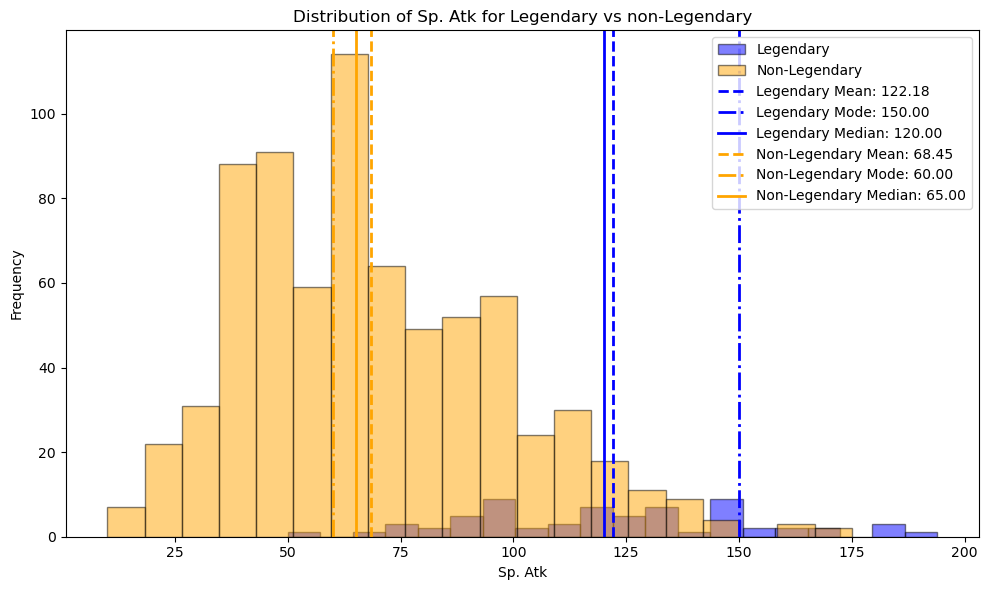

In [49]:
plt.figure(figsize=(10,6))

plt.hist(df_legendary[col], bins=20, alpha=0.5, edgecolor='black', color='blue', label='Legendary')
plt.hist(df_non_legendary[col], bins=20, alpha=0.5, edgecolor='black', color='orange', label='Non-Legendary')

plt.axvline(legendary_stats[0], color='blue', linestyle='--', linewidth=2, label=f'Legendary Mean: {legendary_stats[0]:.2f}')
plt.axvline(legendary_stats[1], color='blue', linestyle='-.', linewidth=2, label=f'Legendary Mode: {legendary_stats[1]:.2f}')
plt.axvline(legendary_stats[2], color='blue', linestyle='-', linewidth=2, label=f'Legendary Median: {legendary_stats[2]:.2f}')
plt.axvline(non_legendary_stats[0], color='orange', linestyle='--', linewidth=2, label=f'Non-Legendary Mean: {non_legendary_stats[0]:.2f}')
plt.axvline(non_legendary_stats[1], color='orange', linestyle='-.', linewidth=2, label=f'Non-Legendary Mode: {non_legendary_stats[1]:.2f}')
plt.axvline(non_legendary_stats[2], color='orange', linestyle='-', linewidth=2, label=f'Non-Legendary Median: {non_legendary_stats[2]:.2f}')

plt.title(f'Distribution of {col} for Legendary vs non-Legendary')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# Task 6 (2 point)

There is a problem that bars for legendary pokemons are significantly smaller than the bars for non-legendary. Explain, why is it happening

<Axes: xlabel='Sp. Atk', ylabel='Count'>

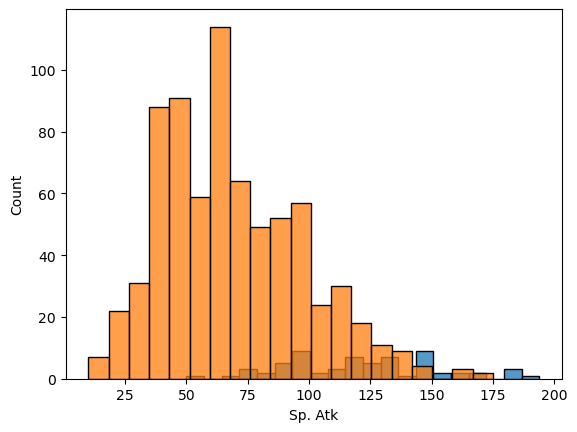

In [71]:
sns.histplot(data=df_legendary, x=col, bins = 20)
sns.histplot(data=df_non_legendary, x=col, bins = 20)

**Answer** \#YOUR ANSWER
We should use "bins" in order to define their sizes.

Fix the histogram (make the bars comparable hights), so it wil be more convenient to compare the distributions.

Hint: consult the [documentation for the histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) and find, which optional arguments may help.

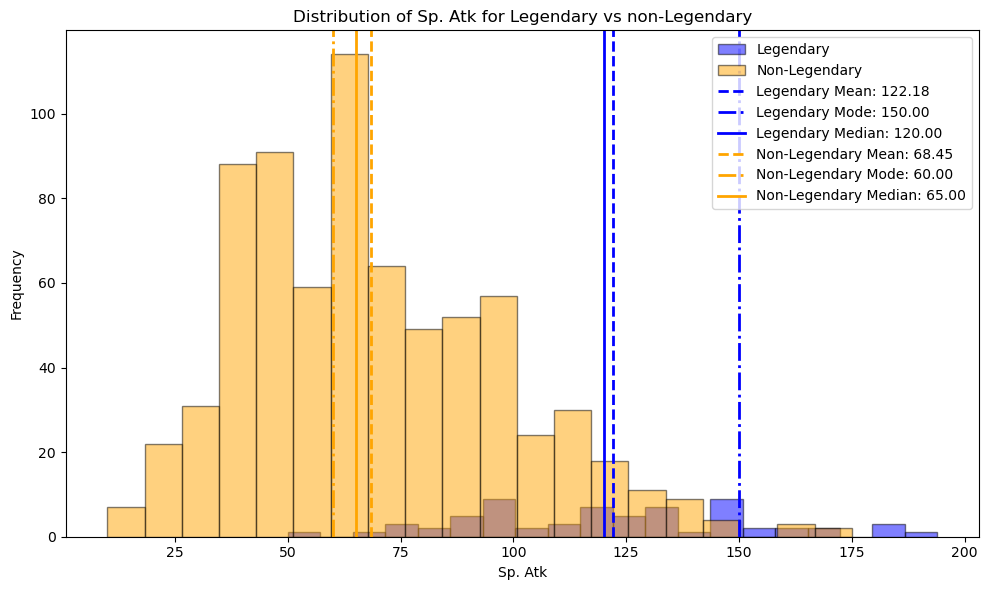

In [73]:
plt.figure(figsize=(10,6))

plt.hist(df_legendary[col], bins=20, alpha=0.5, edgecolor='black', color='blue', label='Legendary')
plt.hist(df_non_legendary[col], bins=20, alpha=0.5, edgecolor='black', color='orange', label='Non-Legendary')

plt.axvline(legendary_stats[0], color='blue', linestyle='--', linewidth=2, label=f'Legendary Mean: {legendary_stats[0]:.2f}')
plt.axvline(legendary_stats[1], color='blue', linestyle='-.', linewidth=2, label=f'Legendary Mode: {legendary_stats[1]:.2f}')
plt.axvline(legendary_stats[2], color='blue', linestyle='-', linewidth=2, label=f'Legendary Median: {legendary_stats[2]:.2f}')
plt.axvline(non_legendary_stats[0], color='orange', linestyle='--', linewidth=2, label=f'Non-Legendary Mean: {non_legendary_stats[0]:.2f}')
plt.axvline(non_legendary_stats[1], color='orange', linestyle='-.', linewidth=2, label=f'Non-Legendary Mode: {non_legendary_stats[1]:.2f}')
plt.axvline(non_legendary_stats[2], color='orange', linestyle='-', linewidth=2, label=f'Non-Legendary Median: {non_legendary_stats[2]:.2f}')

plt.title(f'Distribution of {col} for Legendary vs non-Legendary')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

Now, make conclusions about the distributions

**Answer** \#YOUR ANSWER
The legendary pokemons are rare in comparison with non-legendary since it is obvious.